
# Definição do Problema e Objetivo do Código

Aplicação de modelo Machine learning na manutenção preditiva previne falhas em equipamentos industriais ao analisar dados, evitando paradas não planejadas. Foram disponibilizados dados de 5 sensores presentes em uma máquina industrial. Devido a esses dados virem de sistemas reais podem ruídos e falhas dos sensores/equipamentos, para isso é necessário realizar as etapas de análise exploratória e processamento dos dados.

- Análise exploratória

- Processamento dos dados

In [164]:
# Versão da Linguagem Python
from platform import python_version

print("Versão da Linguagem Python Usada Neste Jupyter Notebook:", python_version())

import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objs as go
from plotly.subplots import make_subplots

%reload_ext watermark
%watermark -a "Eric Mochiutti" --iversions

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.12.11
Author: Eric Mochiutti

pandas    : 2.3.0
platform  : 1.0.8
plotly    : 6.2.0
numpy     : 2.1.3
scipy     : 1.16.0
sklearn   : 1.7.0
matplotlib: 3.10.3



# Análise Exploratória

- Carregando dados brutos dos sensores e as classes de problemas

In [165]:
root_folder = os.path.abspath(os.path.join(".."))

data_raw_path = os.path.join(root_folder, "data", "raw_data")

label_defeito = np.load(os.path.join(data_raw_path, "Classes.npy"), allow_pickle=True)
dados_s1 = np.load(os.path.join(data_raw_path, "Dados_1.npy"), allow_pickle=True)
dados_s2 = np.load(os.path.join(data_raw_path, "Dados_2.npy"), allow_pickle=True)
dados_s3 = np.load(os.path.join(data_raw_path, "Dados_3.npy"), allow_pickle=True)
dados_s4 = np.load(os.path.join(data_raw_path, "Dados_4.npy"), allow_pickle=True)
dados_s5 = np.load(os.path.join(data_raw_path, "Dados_5.npy"), allow_pickle=True)

- Verificação da quantidade de dados, dos tamanhos dos arrays e verificação se os tamanhos dos arrays são compatíveis

In [166]:
print(label_defeito.shape)  # (50000, 1)
print(dados_s1.shape)  # (50000, 201)
print(dados_s2.shape)  # (50000, 201)
print(dados_s3.shape)  # (50000, 201)
print(dados_s4.shape)  # (50000, 200)
print(dados_s5.shape)  # (50000, 200)


(50000, 1)
(50000, 201)
(50000, 201)
(50000, 201)
(50000, 200)
(50000, 200)


- Verificação do balanceamento das classes (classes de defeitos)

In [167]:
labels_unicas, contagem_ocorrencias = np.unique(label_defeito, return_counts=True)
for label, contagem in zip(labels_unicas, contagem_ocorrencias):
    print("Label:", label, " - Quantidade de ocorrências:", contagem)


Label: Classe A  - Quantidade de ocorrências: 10000
Label: Classe B  - Quantidade de ocorrências: 10000
Label: Classe C  - Quantidade de ocorrências: 10000
Label: Classe D  - Quantidade de ocorrências: 10000
Label: Classe E  - Quantidade de ocorrências: 10000


- Plotando gráficos dos sensores para avaliação visual do comportamento dos sensores ao longo do tempo

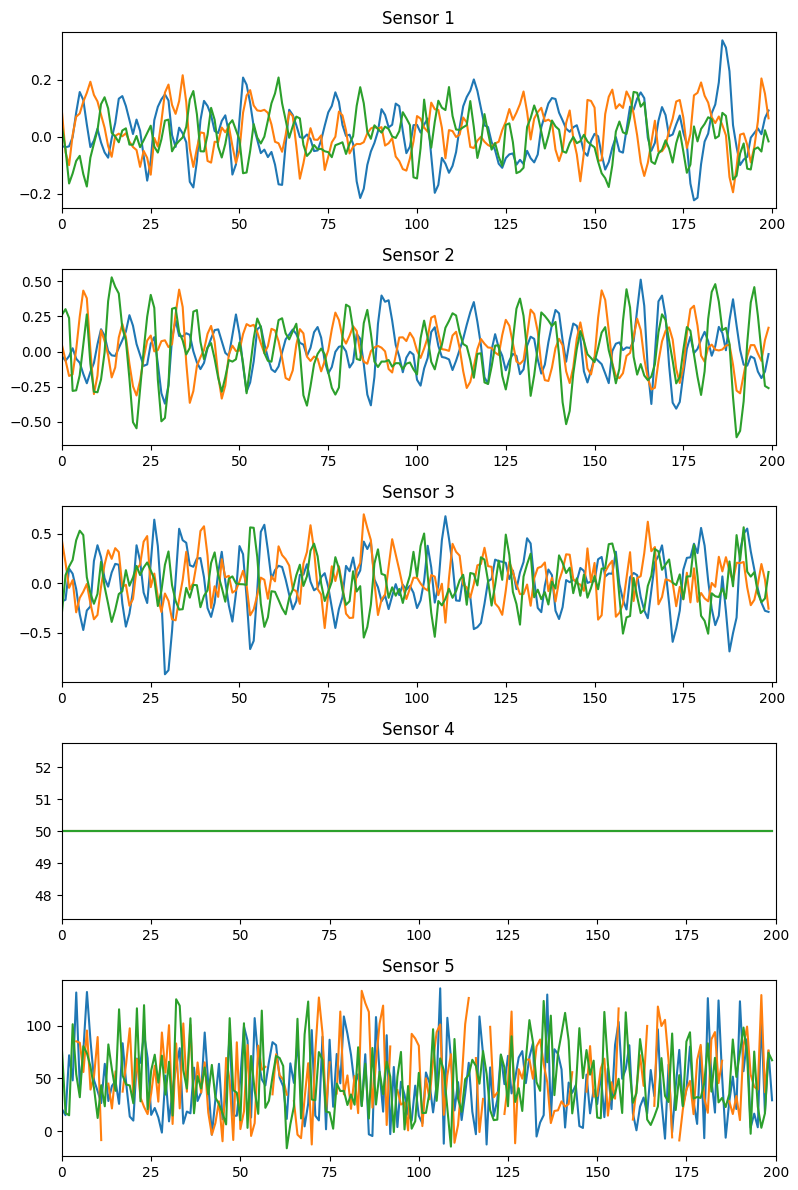

In [168]:
sensores = [dados_s1, dados_s2, dados_s3, dados_s4, dados_s5]

fig, axs = plt.subplots(len(sensores), 1, figsize=(8, 12))

# Plotando os dados em subplots separados
for i, sensor in enumerate(sensores):
    for linha in range(0, 10001, 5000):
        axs[i].plot(sensor[linha, :])
    axs[i].set_title(f"Sensor {i + 1}")

    # Definindo os limites do eixo x para cada sensor
    xmin = 0
    xmax = sensor.shape[1]

    axs[i].set_xlim(xmin, xmax)

plt.tight_layout()
plt.show()

- Verificar a existência de valores NaN, quantidade de valores NaN, valores mínimos e máximos dos dados de cada sensor (verificar ordem de grandeza)

In [169]:
# Função para verificar a existência de NaN e contar a quantidade
def verificar_e_contar_nan(dados):
    tem_nan = np.isnan(dados)
    quantidade_nan = np.count_nonzero(tem_nan)
    return quantidade_nan


# Função para calcular métricas importantes de um conjunto de dados
def calcular_metricas(conjuntos_de_dados):
    for i, dados in enumerate(conjuntos_de_dados, start=1):
        print(f"\nMétricas para o conjunto de dados s{i}:")
        dados_sem_nan = dados[~np.isnan(dados)]
        total_de_dados = len(dados_sem_nan)
        valor_minimo = np.min(dados_sem_nan)
        valor_maximo = np.max(dados_sem_nan)

        print("Total de dados:", total_de_dados)
        print("Valor mínimo:", valor_minimo)
        print("Valor máximo:", valor_maximo)

        # Verificar a existência e contar a quantidade de valores NaN
        quantidade_nan = verificar_e_contar_nan(dados)
        if quantidade_nan > 0:
            print(
                f"No conjunto de dados s{i}: Quantidade de valores NaN:", quantidade_nan
            )
        else:
            print(f"No conjunto de dados s{i}: Não existem valores NaN.")


# Calculando métricas para os sensores
calcular_metricas(sensores)



Métricas para o conjunto de dados s1:
Total de dados: 10000001
Valor mínimo: -0.500583548307494
Valor máximo: 5.0
No conjunto de dados s1: Quantidade de valores NaN: 49999

Métricas para o conjunto de dados s2:
Total de dados: 10000001
Valor mínimo: -1.239735330040627
Valor máximo: 5.0
No conjunto de dados s2: Quantidade de valores NaN: 49999

Métricas para o conjunto de dados s3:
Total de dados: 10000001
Valor mínimo: -1.557491418788932
Valor máximo: 5.0
No conjunto de dados s3: Quantidade de valores NaN: 49999

Métricas para o conjunto de dados s4:
Total de dados: 9990000
Valor mínimo: 50.0
Valor máximo: 50.0
No conjunto de dados s4: Quantidade de valores NaN: 10000

Métricas para o conjunto de dados s5:
Total de dados: 9758488
Valor mínimo: -19.964571047700915
Valor máximo: 139.99831052645226
No conjunto de dados s5: Quantidade de valores NaN: 241512


- Verificar a distribuição dos NaN nos dados brutos dos sensores para decisão de como tratar os valores nulos

In [170]:
sensores = [dados_s1, dados_s2, dados_s3, dados_s4, dados_s5]

for i, sensor in enumerate(sensores, start=1):
    nan_indices = np.argwhere(np.isnan(sensor))
    if len(nan_indices) > 0:
        print(f"No sensor {i}: Valores NaN encontrados nos índices:")
        print(nan_indices)

        # Verificando se há repetição nos índices
        unique_indices = np.unique(
            nan_indices[:, 1]
        )  # Obtém os índices únicos das colunas
        if len(unique_indices) == 1:
            print(f"No sensor {i}: Todos os NaN estão na coluna {unique_indices[0]}.")
        else:
            print(f"No sensor {i}: Os NaN estão distribuídos em diferentes colunas.")
    else:
        print(f"No sensor {i}: Nenhum valor NaN encontrado.")

No sensor 1: Valores NaN encontrados nos índices:
[[    0   200]
 [    1   200]
 [    2   200]
 ...
 [49997   200]
 [49998   200]
 [49999   200]]
No sensor 1: Todos os NaN estão na coluna 200.
No sensor 2: Valores NaN encontrados nos índices:
[[    0   200]
 [    1   200]
 [    2   200]
 ...
 [49997   200]
 [49998   200]
 [49999   200]]
No sensor 2: Todos os NaN estão na coluna 200.
No sensor 3: Valores NaN encontrados nos índices:
[[    0   200]
 [    1   200]
 [    2   200]
 ...
 [49997   200]
 [49998   200]
 [49999   200]]
No sensor 3: Todos os NaN estão na coluna 200.
No sensor 4: Valores NaN encontrados nos índices:
[[    3   139]
 [   12   159]
 [   13   151]
 ...
 [49966    12]
 [49982    95]
 [49997   138]]
No sensor 4: Os NaN estão distribuídos em diferentes colunas.
No sensor 5: Valores NaN encontrados nos índices:
[[    1    32]
 [    1    35]
 [    1    38]
 ...
 [49999   110]
 [49999   137]
 [49999   160]]
No sensor 5: Os NaN estão distribuídos em diferentes colunas.


--> Análise: Observe que para os Sensores 1, 2, 3 todos os NaN são encontrados no ultimo valor de medida do sensor (vetor 201), já para os sensores 4 e 5 estão distribuidos nos dados. Devido aos dados possuirem tamanhos diferentes como visto inicialmente, (50000x201) para S1, S2 e S3, (50000x200) para S4 e S5, podemos excluir os dados finais NaNs de S1,S2, S3.


- Realizar o plot dos sensores S4 e S5, para ver como serão tratados esses valores de NaN distribuidos ao longo dos dados dos sensores.

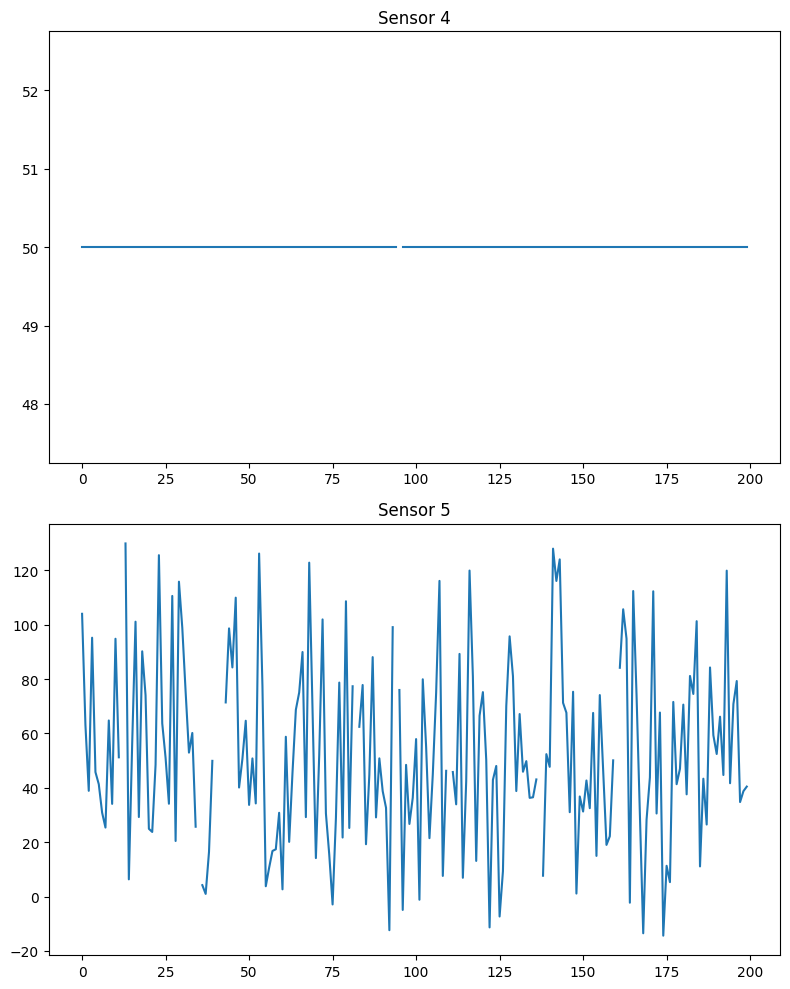

In [171]:
# Suponha que você tenha os dados dos sensores dados_s4 e dados_s5
sensores_NaN_distribuidos = [dados_s4, dados_s5]

# Criando subplots para cada sensor
fig, axs = plt.subplots(len(sensores_NaN_distribuidos), 1, figsize=(8, 10))

axs[0].plot(sensores_NaN_distribuidos[0][49982, :], label="dados_s4")
axs[0].set_title("Sensor 4")

axs[1].plot(sensores_NaN_distribuidos[1][49999, :], label="dados_s5")
axs[1].set_title("Sensor 5")


plt.tight_layout()
plt.show()

# Decisão sobre o tratamento dos valores de NaN: 

- Sensores S1, S2, S3 terão os valores de NaN removidos do ultimo instante de tempo (201).

- Sensor 4, os valores de NaN serão substituidos por 50.0.

- No Sensor 5, os valores NaN serão calculados por meio de interpolação linear e substituídos pelos valores calculados. No entanto, os valores que estão no tempo inicial e tempo final não podem ser interpolados e, portanto, também precisam ser substituídos por zero.

# Processamento dos dados

In [172]:
# Remoção dos valores NaN dos ultimos instantes de tempo
dados_s1_NaN_remove = dados_s1[:, :200]
dados_s2_NaN_remove = dados_s2[:, :200]
dados_s3_NaN_remove = dados_s3[:, :200]

# Conversão em pandas
df_dados_s4 = pd.DataFrame(dados_s4)
df_dados_s5 = pd.DataFrame(dados_s5)

# Substituir NaN por 50. no sensor S4
df_dados_s4_preenchidos = df_dados_s4.fillna(50.0)

# Interpolar para preencher os valores NaN no Sensor S5
df_dados_s5_interpolados = df_dados_s5.interpolate(method="linear", axis=1)

df_df_dados_s5_preenchidos = df_dados_s5_interpolados.fillna(0.0)

# DataFrame para um array numpy
dados_s4_NaN_remove = df_dados_s4_preenchidos.values
dados_s5_NaN_remove = df_df_dados_s5_preenchidos.values


- Verificando se o tamanho dos arrays estão compativeis

In [173]:
print(label_defeito.shape)  # (50000, 1)
print(dados_s1_NaN_remove.shape)  # (50000, 200)
print(dados_s2_NaN_remove.shape)  # (50000, 200)
print(dados_s3_NaN_remove.shape)  # (50000, 200)
print(dados_s4_NaN_remove.shape)  # (50000, 200)
print(dados_s5_NaN_remove.shape)  # (50000, 200)

(50000, 1)
(50000, 200)
(50000, 200)
(50000, 200)
(50000, 200)
(50000, 200)


- Avaliação gráfica das substituições dos valores nulos

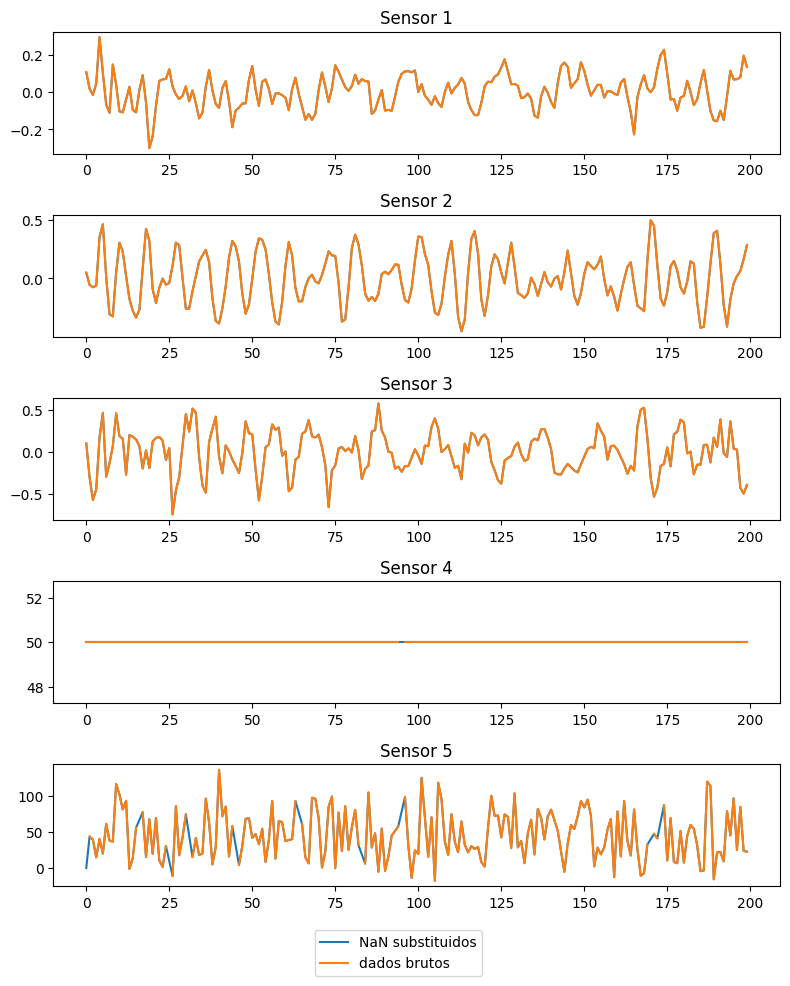

In [174]:
sensores_NaN_removidos = [
    dados_s1_NaN_remove,
    dados_s2_NaN_remove,
    dados_s3_NaN_remove,
    dados_s4_NaN_remove,
    dados_s5_NaN_remove,
]

fig, axs = plt.subplots(len(sensores), 1, figsize=(8, 10))

axs[0].plot(sensores_NaN_removidos[0][49999, :], label="dados_s1_NaN_removido")
axs[0].plot(sensores[0][49999, :], label="dados_s1")
axs[0].set_title("Sensor 1")

axs[1].plot(sensores_NaN_removidos[1][49999, :], label="dados_s2_NaN_removido")
axs[1].plot(sensores[1][49999, :], label="dados_s2")
axs[1].set_title("Sensor 2")

axs[2].plot(sensores_NaN_removidos[2][49999, :], label="dados_s3_NaN_removido")
axs[2].plot(sensores[2][49999, :], label="dados_s3")
axs[2].set_title("Sensor 3")

axs[3].plot(sensores_NaN_removidos[3][49982, :], label="dados_s4_NaN_removido")
axs[3].plot(sensores[3][49982, :], label="dados_s4")
axs[3].set_title("Sensor 4")

axs[4].plot(sensores_NaN_removidos[4][40, :], label="dados_s5_NaN_removido")
axs[4].plot(sensores[4][40, :], label="dados_s5")
axs[4].set_title("Sensor 5")

plt.legend(
    ["NaN substituidos", "dados brutos"], loc="upper left", bbox_to_anchor=(0.35, -0.3)
)
plt.tight_layout()
plt.show()

- Avaliação dos boxplots para verificação dos limites inferiores e superiores outliers e a verificar se a diferença da ordem de grandeza iria causar distorções na normalização minmax

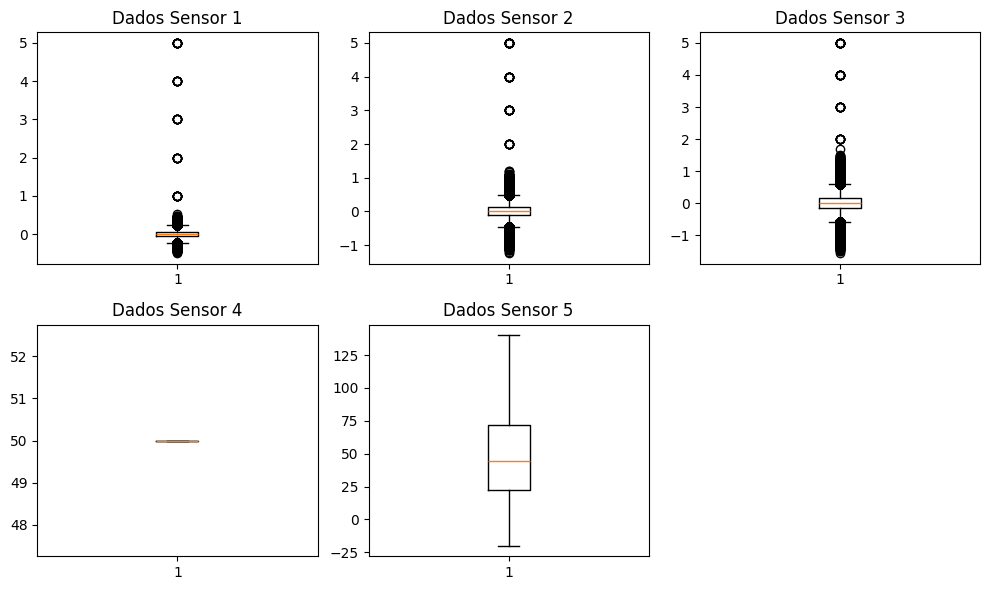

In [175]:
plt.figure(figsize=(10, 6))

for i, sensor in enumerate(sensores_NaN_removidos):
    plt.subplot(2, 3, i + 1)  # Adicionando 1 ao índice
    plt.boxplot(sensor.flatten())
    plt.title(f"Dados Sensor {i + 1}")

# Ajustando o layout
plt.tight_layout()

# Exibindo os boxplots
plt.show()


- Para a normalização usei a função minmax para os valores ficarem entre 0 e 1 considerando os outliers, mantendo assim o comportamento físico detectado pelo sensor (esses valores são importantes no contexto do problema, devido a possivelmente indicarem defeitos nas máquinas).

# Normalização MinMax

- Separação dos dados em treino e teste para o modelo
- Criação dos scalers min-max para o normalização e desnormalização dos dados 
- Salvamento dos dados normalizados de treino e de teste

In [176]:
scaler_path = os.path.join(root_folder, "modelo", "scalers")
data_processed_path = os.path.join(root_folder, "data", "processed_data")

sensor_names = [f"Dados_{i + 1}" for i in range(5)]

labels = label_defeito

indices = np.arange(len(labels))
idx_train, idx_test = train_test_split(
    indices, test_size=0.2, random_state=42, stratify=labels
)

label_train = labels[idx_train]
label_test = labels[idx_test]

# Salva labels separados
np.save(os.path.join(data_processed_path, "label_train.npy"), label_train)
np.save(os.path.join(data_processed_path, "label_test.npy"), label_test)

# Agora para cada sensor, separar, normalizar e salvar
for i, name in enumerate(sensor_names):
    X = sensores_NaN_removidos[i]

    X_train = X[idx_train]
    X_test = X[idx_test]

    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 1)).reshape(X_train.shape)
    X_test_scaled = scaler.transform(X_test.reshape(-1, 1)).reshape(X_test.shape)

    # Salva scaler
    with open(os.path.join(scaler_path, f"scaler_sensor_{i + 1}.pkl"), "wb") as f:
        pickle.dump(scaler, f)

    # Salva arrays normalizados
    np.save(os.path.join(data_processed_path, f"{name}_treino.npy"), X_train_scaled)
    np.save(os.path.join(data_processed_path, f"{name}_teste.npy"), X_test_scaled)

- Verificação gráfica dos valores normalizados

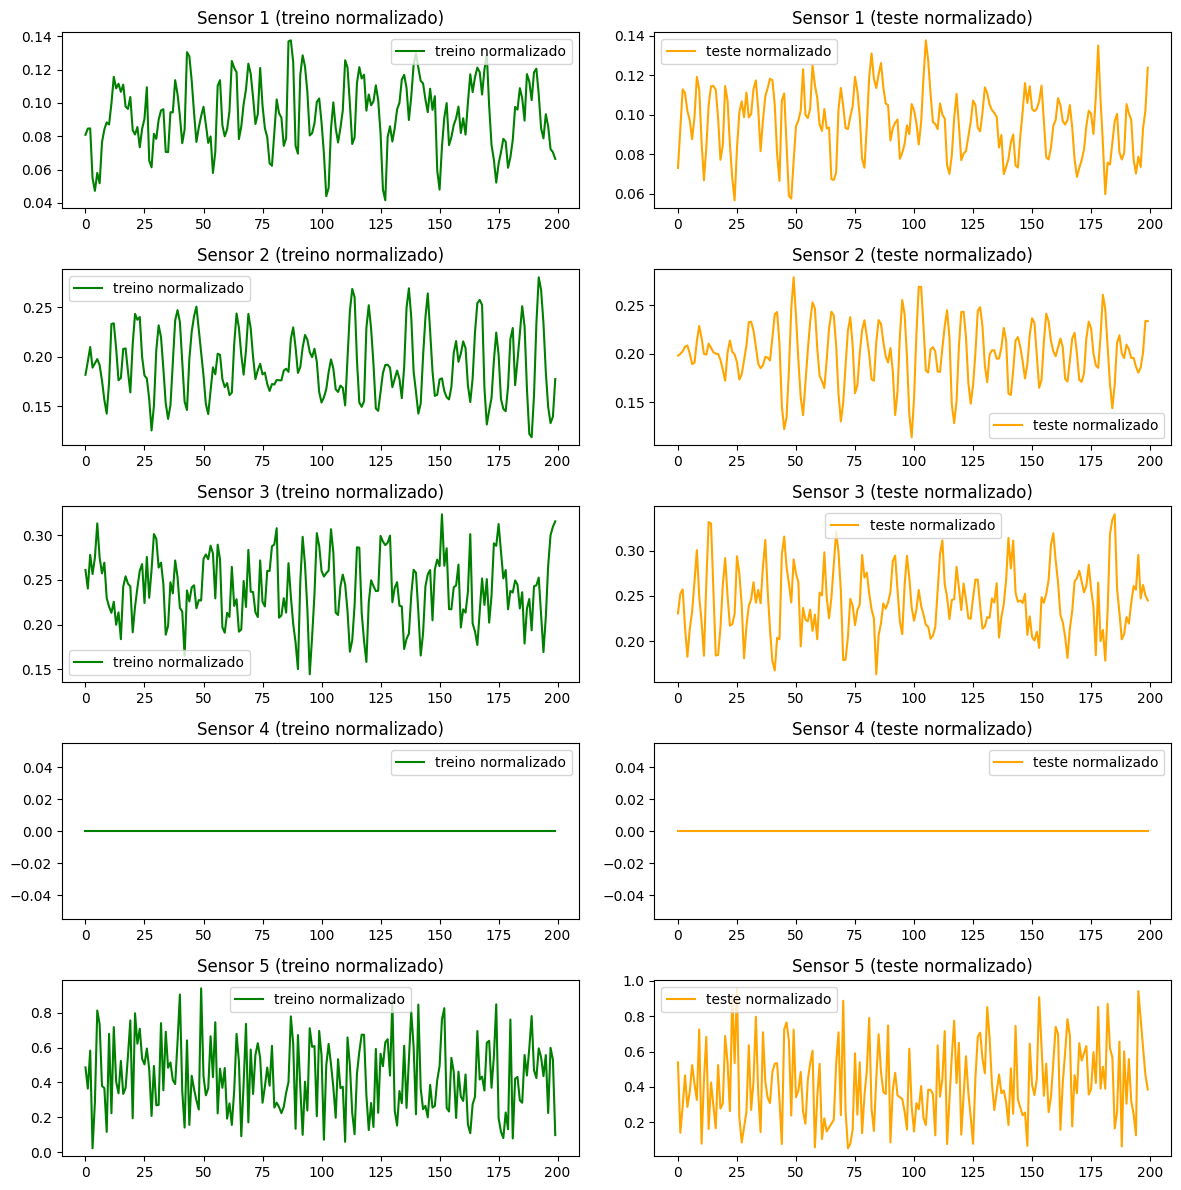

In [177]:
normalized_train = [
    np.load(os.path.join(data_processed_path, f"Dados_{i + 1}_treino.npy"))
    for i in range(5)
]
normalized_test = [
    np.load(os.path.join(data_processed_path, f"Dados_{i + 1}_teste.npy"))
    for i in range(5)
]

# Plota os gráficos
fig, axs = plt.subplots(len(normalized_train), 2, figsize=(12, 12))

for i in range(5):
    idx_train = min(10, normalized_train[i].shape[0] - 1)
    idx_test = min(10, normalized_test[i].shape[0] - 1)
    idx_raw = min(10, sensores_NaN_removidos[i].shape[0] - 1)

    axs[i, 0].plot(
        normalized_train[i][idx_train, :], label="treino normalizado", color="green"
    )
    axs[i, 0].set_title(f"Sensor {i + 1} (treino normalizado)")
    axs[i, 0].legend()

    axs[i, 1].plot(
        normalized_test[i][idx_test, :], label="teste normalizado", color="orange"
    )
    axs[i, 1].set_title(f"Sensor {i + 1} (teste normalizado)")
    axs[i, 1].legend()

plt.tight_layout()
plt.show()